In [1]:
import pandas as pd

In [2]:
import numpy as np

In [38]:
# load in wego data
wego = pd.read_csv("C:/Users/marya/Documents/DA11/Python/projects/wego-caesars-legion/data/WeGo_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

### Date Range of Data

In [5]:
# convert date to datetime object
wego['DATE_convert'] = pd.to_datetime(wego['DATE'], format='mixed')

In [6]:
# Earliest date
wego['DATE_convert'].min()

Timestamp('2023-08-01 00:00:00')

In [7]:
# Latest date
wego['DATE_convert'].max()

Timestamp('2023-09-30 00:00:00')

### 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

### Overall on-time performance

In [8]:
wego['ADJUSTED_ONTIME_COUNT'].sum()/len(wego)*100

# 77% of all checkpoints are on-time

77.08411236295025

### Distribution of adherence

In [9]:
# adherence statistics
wego[['ADHERENCE']].apply(['min','max','mean','median'])

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796
median,-2.000000


In [10]:
# adherence average
ad_mean = wego['ADHERENCE'].mean()
ad_mean

-3.1887964314276354

### Plotting Adherence Deviation

In [11]:
# adherence standard deviation
ad_std = np.std(wego['ADHERENCE'])

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence Deviation')]

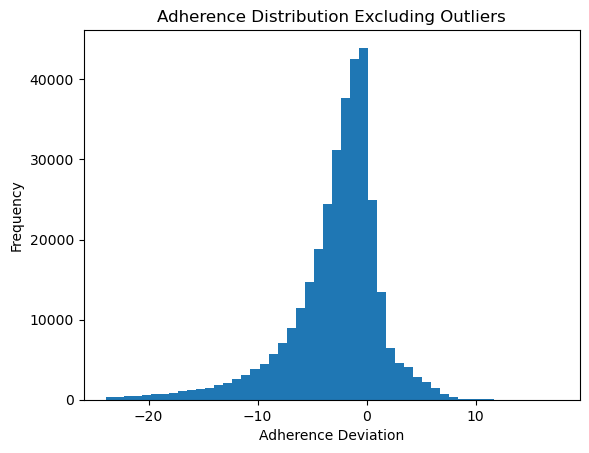

In [12]:
#plotting adherence distribution
ax = (
      wego[wego['ADHERENCE'].between(ad_mean - ad_std*3, ad_mean + ad_std*3, inclusive='both')]['ADHERENCE']
      .plot(kind='hist',bins=50)
    )
ax.set(
    title='Adherence Distribution Excluding Outliers',
    xlabel = 'Adherence Deviation'
    )

### Distribution of headway

In [13]:
# headway statistics
wego[['HDWY_DEV']].apply(['min','max','mean','median'])

,HDWY_DEV
min,-64.000000
max,565.433333
mean,0.518081
median,0.033333


In [14]:
# headway average
hdwy_mean = wego['HDWY_DEV'].mean()
hdwy_mean

0.5180811263102076

In [15]:
#headway standard deviation
hdwy_std = np.std(wego['HDWY_DEV'])

### Plotting Headway Deviation

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

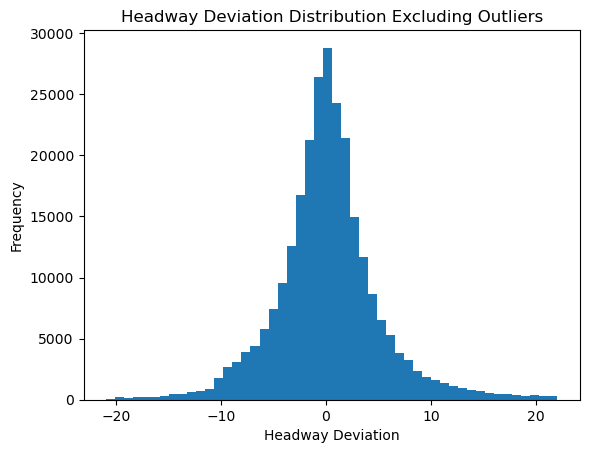

In [16]:
# plotting headway distribution
ax = (
    wego[wego['HDWY_DEV'].between(hdwy_mean - hdwy_std*3, hdwy_mean + hdwy_std*3, inclusive='both')]['HDWY_DEV']
    .plot(kind='hist',bins=50)
    )

ax.set(
    title='Headway Deviation Distribution Excluding Outliers',
    xlabel = 'Headway Deviation'
    )

### Number of Perfect Trips

In [17]:
# creating unique ID
wego['DATE_TRIP'] = wego.apply(lambda row: str(row['CALENDAR_ID']) + '-' + str(row['TRIP_ID']), axis=1)

In [18]:
wego['DATE_TRIP'].unique()

array(['120230801-345104', '120230801-345105', '120230801-345106', ...,
       '120230930-353447', '120230930-353448', '120230930-353449'],
      dtype=object)

In [19]:
# sum of trips by unique trip
unique_trips = wego.groupby(wego['DATE_TRIP'])[['ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].sum()

In [20]:
# df of perfect trips
perfect_trips = unique_trips[(unique_trips['ADJUSTED_EARLY_COUNT'] == 0) & (unique_trips['ADJUSTED_LATE_COUNT'] == 0)]

In [21]:
# percent of perfect trips
round(len(perfect_trips['ADJUSTED_ONTIME_COUNT'])/len(unique_trips)*100,2)

60.62

In [22]:
len(perfect_trips)

40843

### 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [141]:
wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']['HDWY_DEV_PCT'].mean()

22.179486737640314

In [142]:
wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']['HDWY_DEV_PCT'].mean()

29.216260887830146

In [203]:
adh_dir = (
    wego.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].sum()

)

### Adherence + Direction

In [204]:
adh_dir['TOTALS'] = adh_dir.sum(axis=1)

In [205]:
adh_dir.loc[:, 'ONTIME_PCT'] = adh_dir['ADJUSTED_ONTIME_COUNT'] / adh_dir['TOTALS'] * 100
adh_dir.loc[:, 'EARLY_PCT'] = adh_dir['ADJUSTED_EARLY_COUNT'] / adh_dir['TOTALS'] * 100
adh_dir.loc[:, 'LATE_PCT'] = adh_dir['ADJUSTED_LATE_COUNT'] / adh_dir['TOTALS'] * 100

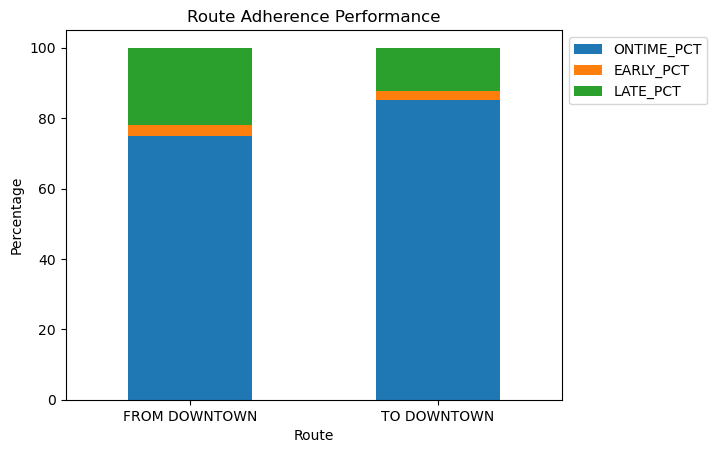

In [206]:
ax = (
    adh_dir[['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']]
).plot(kind='bar', stacked=True)
ax.set(title = 'Route Adherence Performance',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

### Adherence + Route

In [199]:
adh_route = (
    wego.groupby('ROUTE_ABBR')[['ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].sum()

)

In [200]:
adh_route['TOTALS'] = adh_route.sum(axis=1)

In [201]:
adh_route.loc[:, 'ONTIME_PCT'] = adh_route['ADJUSTED_ONTIME_COUNT'] / adh_route['TOTALS'] * 100
adh_route.loc[:, 'EARLY_PCT'] = adh_route['ADJUSTED_EARLY_COUNT'] / adh_route['TOTALS'] * 100
adh_route.loc[:, 'LATE_PCT'] = adh_route['ADJUSTED_LATE_COUNT'] / adh_route['TOTALS'] * 100

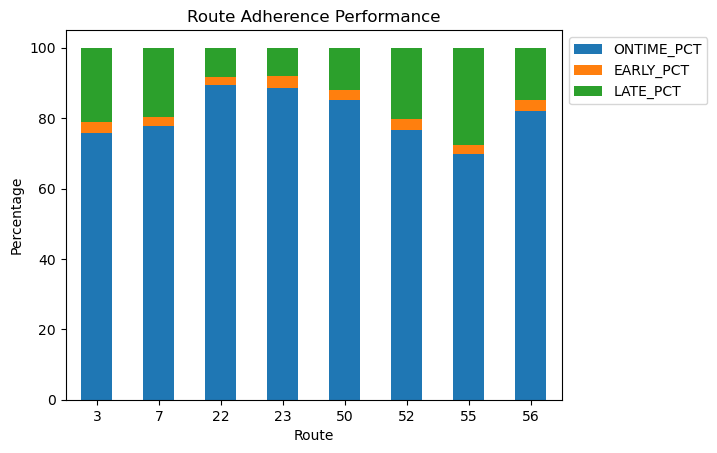

In [202]:
# Route Adherence graph
ax = (
    adh_route[['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']]
).plot(kind='bar', stacked=True)
ax.set(title = 'Route Adherence Performance',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

### Headway + Direction

In [208]:
hdwy_dir = (
    wego.groupby('ROUTE_DIRECTION_NAME')
    [['HDWY_ACCEPTABLE','HDWY_NACCEPTABLE','HDWY_IDEAL']].sum()

)

In [212]:
hdwy_dir['TOTALS'] = hdwy_dir.sum(axis=1)

In [213]:
hdwy_dir.loc[:, 'ACCPETABLE_PCT'] = hdwy_dir['HDWY_ACCEPTABLE'] / hdwy_dir['TOTALS'] * 100
hdwy_dir.loc[:, 'NACCEPTABLE_PCT'] = hdwy_dir['HDWY_NACCEPTABLE'] / hdwy_dir['TOTALS'] * 100
hdwy_dir.loc[:, 'IDEAL_PCT'] = hdwy_dir['HDWY_IDEAL'] / hdwy_dir['TOTALS'] * 100

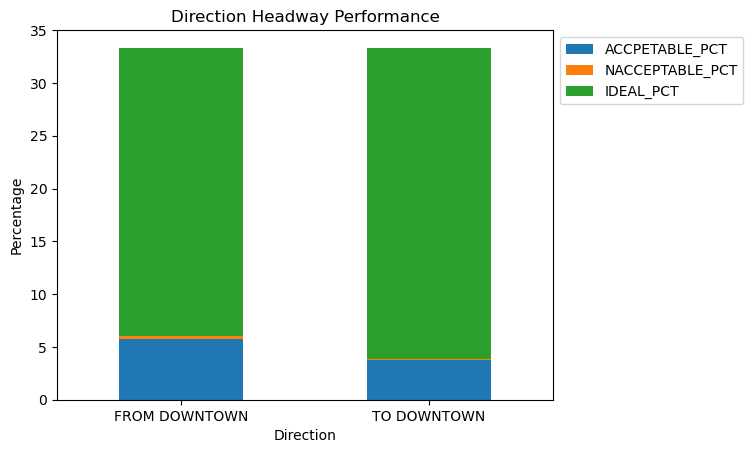

In [214]:
# Direction HDWY graph
ax = (
    hdwy_dir[['ACCPETABLE_PCT', 'NACCEPTABLE_PCT', 'IDEAL_PCT']]
).plot(kind='bar', stacked=True)
ax.set(title = 'Direction Headway Performance',
        xlabel = 'Direction',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

### Headway + Route

In [221]:
hdwy_route = (
    wego.groupby('ROUTE_ABBR')
    [['HDWY_ACCEPTABLE','HDWY_NACCEPTABLE','HDWY_IDEAL']].sum()

)

In [222]:
hdwy_route['TOTALS'] = hdwy_route.sum(axis=1)

In [223]:
hdwy_route.loc[:, 'ACCPETABLE_PCT'] = hdwy_route['HDWY_ACCEPTABLE'] / hdwy_route['TOTALS'] * 100
hdwy_route.loc[:, 'NACCEPTABLE_PCT'] = hdwy_route['HDWY_NACCEPTABLE'] / hdwy_route['TOTALS'] * 100
hdwy_route.loc[:, 'IDEAL_PCT'] = hdwy_route['HDWY_IDEAL'] / hdwy_route['TOTALS'] * 100

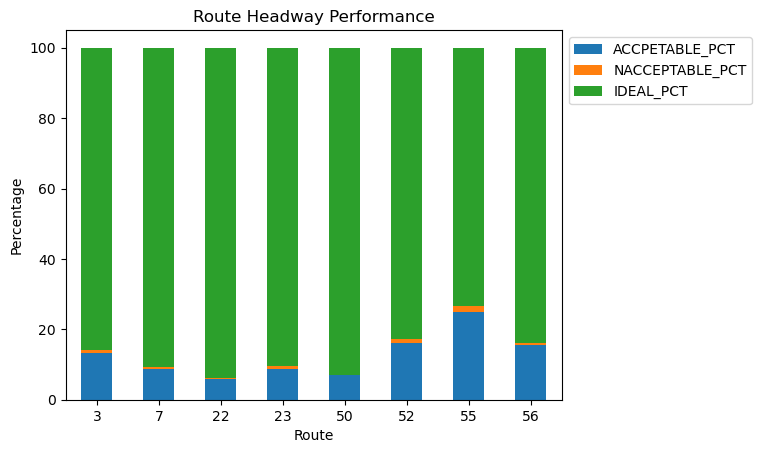

In [224]:
# Route HDWY graph
ax = (
    hdwy_route[['ACCPETABLE_PCT', 'NACCEPTABLE_PCT', 'IDEAL_PCT']]
).plot(kind='bar', stacked=True)
ax.set(title = 'Route Headway Performance',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

### Random HDWY AND ADH Statistics

In [23]:
wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']['ADHERENCE'].apply(['min','max','mean','median'])

min      -618.166666
max        88.383333
mean       -2.321804
median     -1.500000
Name: ADHERENCE, dtype: float64

In [24]:
wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']['ADHERENCE'].apply(['min','max','mean','median'])

min      -948.533333
max        76.766666
mean       -3.960287
median     -2.516666
Name: ADHERENCE, dtype: float64

In [25]:
wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']['HDWY_DEV'].apply(['min','max','mean','median'])

min       -64.000000
max       543.833333
mean        0.447773
median      0.033333
Name: HDWY_DEV, dtype: float64

In [26]:
wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']['HDWY_DEV'].apply(['min','max','mean','median'])

min       -55.533334
max       565.433333
mean        0.579990
median      0.033333
Name: HDWY_DEV, dtype: float64

In [27]:
wego.groupby('ROUTE_ABBR')[['ADHERENCE','HDWY_DEV']].describe()

ADHERENCE                                                      \
               count      mean       std         min       25%       50%   
ROUTE_ABBR                                                                 
3            45488.0 -3.761491  5.415910 -133.250000 -5.350000 -2.566666   
7            17267.0 -3.346555  6.669753  -87.716666 -4.916666 -2.116666   
22           25188.0 -1.138107  6.391798 -675.000000 -2.950000 -0.933333   
23           39653.0 -1.760110  7.680491 -618.166666 -3.116666 -1.316666   
50           42629.0 -2.505022  6.159666 -489.316666 -3.883333 -1.800000   
52           49327.0 -3.971342  8.721732 -948.533333 -5.016666 -2.066666   
55           60359.0 -4.823302  7.535092 -375.233333 -6.583333 -2.883333   
56           58950.0 -2.703988  4.931009 -322.783333 -4.300000 -1.900000   

                                HDWY_DEV                                  \
                 75%        max    count      mean        std        min   
ROUTE_ABBR                                                                 
3          -0.766666  33.750000  36583.0  0.580907   6.203530 -64.000000   
7          -0.616666  88.383333  11578.0  0.336808   5.909983 -30.433334   
22          0.816666  24.733333  17007.0  0.955867  10.248444 -43.650000   
23          0.033333  33.633333  28478.0  1.053563   9.881327 -32.116667   
50         -0.300000  22.350000  34593.0  0.212376   4.760558 -33.250000   
52         -0.400000  30.200000  39887.0  0.974776   9.185015 -55.533334   
55         -0.850000  40.250000  49432.0  0.261038   6.364978 -29.933334   
56         -0.283333  39.916666  48335.0  0.149213   4.714435 -27.266667   

                                                      
                 25%       50%       75%         max  
ROUTE_ABBR                                            
3          -2.450000  0.116666  2.800000   76.866666  
7          -1.983334  0.033333  2.133333   50.250000  
22         -1.966667  0.050000  2.200000  508.700000  
23         -1.733334  0.066666  2.066666  565.433333  
50         -2.083334  0.033333  2.183333   54.283333  
52         -2.450000  0.083333  2.783333  472.366666  
55         -3.150000 -0.033334  2.983333  102.000000  
56         -2.333334  0.000000  2.383333  166.000000

In [28]:
wego.groupby('BLOCK_ABBR')[['ADHERENCE','HDWY_DEV']].mean().abs().sort_values('ADHERENCE',ascending=True)

,ADHERENCE,HDWY_DEV
BLOCK_ABBR,,
8604,0.281250,1.238889
2301,0.353140,0.263938
2210,0.442440,0.874254
2211,0.529404,0.778633
8401,0.603704,NaN
...,...,...
5218,7.901945,3.985199
5513,8.414195,0.912638
5590,9.226351,NaN


### 3. How does time of day or day of week affect headway and on-time performance?

In [158]:
### create new df with nans dropped
new_wego = wego.dropna(subset=['ACTUAL_DEPARTURE_TIME'])

In [159]:
new_wego['DATE_convert'] = pd.to_datetime(new_wego['DATE'], format='mixed')

In [178]:
new_wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(new_wego['ACTUAL_DEPARTURE_TIME'], format='mixed')

In [179]:
#create weekday column
new_wego['WEEKDAY'] = new_wego['ACTUAL_DEPARTURE_TIME'].dt.weekday

In [161]:
# convert departure time to datetime
new_wego['ACTUAL_DEPARTURE_TIME_convert'] = pd.to_datetime(new_wego['ACTUAL_DEPARTURE_TIME'], format='mixed')

### Headway & Adherence by hour

In [166]:
new_wego['TIME'] = new_wego['ACTUAL_DEPARTURE_TIME_convert'].dt.time

In [167]:
type(new_wego['TIME'][0])

C:\Users\marya\AppData\Local\Temp\ipykernel_5772\1238179089.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(new_wego['TIME'][0])


datetime.time

In [169]:
new_wego['DEPART_TIME'] = ([pd.to_datetime('2000-01-01 ' + str(t), format='mixed') for t in new_wego['TIME']])

In [170]:
# calculate adherence by hour
adherence_by_time = (new_wego.groupby(pd.Grouper(key='DEPART_TIME',freq='1h'))[['ADHERENCE','HDWY_DEV']].mean().reset_index())

In [171]:
adherence_by_time

,DEPART_TIME,ADHERENCE,HDWY_DEV
0,2000-01-01 00:00:00,-4.478019,0.905051
1,2000-01-01 01:00:00,-10.618182,4.021621
2,2000-01-01 02:00:00,NaN,NaN
3,2000-01-01 03:00:00,NaN,NaN
4,2000-01-01 04:00:00,-0.785533,-0.771043
5,2000-01-01 05:00:00,-0.966710,0.306431
6,2000-01-01 06:00:00,-1.501108,0.347326
7,2000-01-01 07:00:00,-2.691298,0.700018
8,2000-01-01 08:00:00,-3.758128,0.413859
9,2000-01-01 09:00:00,-2.611876,0.265547


In [180]:
adherence_by_day = new_wego.groupby('WEEKDAY')[['ADHERENCE','HDWY_DEV']].mean().reset_index()

In [181]:
adherence_by_day

,WEEKDAY,ADHERENCE,HDWY_DEV
0,0,-2.434586,0.289773
1,1,-2.952484,0.401450
2,2,-3.264622,0.368556
3,3,-3.455171,0.524049
4,4,-3.792110,0.644195
5,5,-3.400493,0.633628
6,6,-2.808781,1.016830


In [182]:
new_wego['HOUR'] = pd.to_datetime(new_wego['ACTUAL_DEPARTURE_TIME'], format='mixed').dt.hour

In [184]:
adherence_by_day = new_wego.groupby('HOUR')[['ADHERENCE','HDWY_DEV','SCHEDULED_HDWY']].mean().reset_index()

In [189]:
adherence_by_day

,HOUR,ADHERENCE,HDWY_DEV,SCHEDULED_HDWY
0,0,-4.478019,0.905051,32.144821
1,1,-10.618182,4.021621,44.594595
2,4,-0.785533,-0.771043,23.632184
3,5,-0.966710,0.306431,20.891133
4,6,-1.501108,0.347326,16.538616
5,7,-2.691298,0.700018,14.938857
6,8,-3.758128,0.413859,15.338848
7,9,-2.611876,0.265547,16.344796
8,10,-2.117932,0.314521,16.090257
9,11,-2.269175,0.392361,16.192914


In [134]:
# Calculate HDWY Deviation Percentage
def get_dev_pct(row):
    if row['SCHEDULED_HDWY'] != 0:
        return abs(row['HDWY_DEV']) / row['SCHEDULED_HDWY'] * 100
    else:
        return np.NaN

In [135]:
# create headway deviation percentable column
wego.loc[:, 'HDWY_DEV_PCT'] = wego.apply(lambda r: get_dev_pct(r), axis=1)

In [234]:
def hdwy_acpt(pct):
    if (pct >= 50) & (pct <= 150):
        return int(1)
    else:
        return int(0);
def hdwy_nacpt(pct):
    if pct < 50 or pct > 150:
        return int(1)
    else:
        return int(0);

In [78]:
def hdwy_bunch(dev):
    if dev < 0:
        return int(1)
    else:
        return int(0);
def hdwy_gap(dev):
    if dev > 0:
        return int(1)
    else:
        return int(0);
def hdwy_perf(dev):
    if dev == 0:
        return int(1)
    else:
        return int(0);

In [79]:
wego.loc[:,'HDWY_GAPPING'] = wego['HDWY_DEV'].apply(hdwy_gap)

In [80]:
wego.loc[:,'HDWY_PERFECT'] = wego['HDWY_DEV'].apply(hdwy_perf)

In [81]:
wego.loc[:,'HDWY_BUNCHING'] = wego['HDWY_DEV'].apply(hdwy_bunch)

In [230]:
wego.loc[:,'HDWY_ACCEPTABLE'] = wego['HDWY_DEV_PCT'].apply(hdwy_acpt)

In [231]:
wego.loc[:,'HDWY_NACCEPTABLE'] = wego['HDWY_DEV_PCT'].apply(hdwy_nacpt)

In [139]:
# HDWY DEV
wego_hdwy_dev_sums = wego[['HDWY_GAPPING', 'HDWY_PERFECT', 'HDWY_BUNCHING']].sum()

In [140]:
wego_hdwy_dev_sums

HDWY_GAPPING     134089
HDWY_PERFECT        760
HDWY_BUNCHING    131044
dtype: int64

[Text(0.5, 1.0, 'Headway Deviation Gapping or Bunching'),
 Text(0.5, 0, 'Stops')]

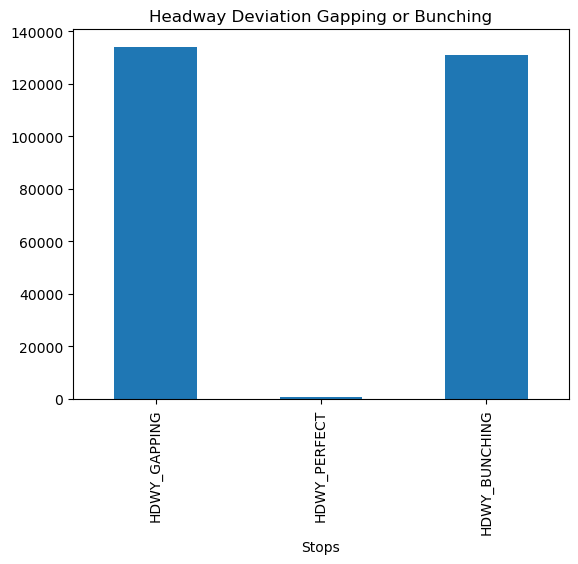

In [96]:
# plotting headway  
ax = (
    wego_hdwy_dev_sums
    .plot(kind='bar')
    )

ax.set(
    title='Headway Deviation Gapping or Bunching',
    xlabel = 'Stops'
    )

In [232]:
# HDWY_DEV_PCT
wego_hdwy_pct_sums = wego[['HDWY_ACCEPTABLE','HDWY_NACCEPTABLE']].sum()

[Text(0.5, 1.0, 'Headway Deviation Range'), Text(0.5, 0, 'Stops')]

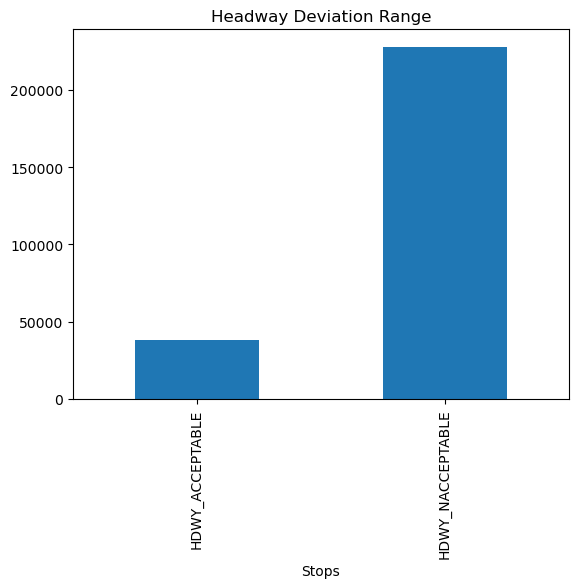

In [233]:
# plotting headway pct 
ax = (
    wego_hdwy_pct_sums
    .plot(kind='bar')
    )

ax.set(
    title='Headway Deviation Range',
    xlabel = 'Stops'
    )